In [1]:
# Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Etape à adapter selon le chemin du fichier
# Chargement du fichier
allocine = pd.read_excel(r"C:\Users\maoui\OneDrive\Documents\Data Scientest\DTS - Projet\allocine_dataviz_final.xlsx")
allocine.head()

,ID,titre,titre_original,acteurs,acteur_1,acteur_2,acteur_3,acteur_4,realisateur,real_1,...,date2,annee,jour_split,mois_split,annee_split,actors_score,directors_score,scenaristes_score,distrib_score,budget_dollars
0,270572,Petta,PETTA,"Rajinikanth, Vijay Sethupathi, Nawazuddin Sidd...",Rajinikanth,Vijay Sethupathi,Nawazuddin Siddiqui,Bobby Simha,Karthik Subbaraj,Karthik Subbaraj,...,2019-01-10,2019.0,10.0,1.0,2019.0,0.455621,1.125524,0.141740,0.01495,1.0
1,293378,Les SEGPA,LES SEGPA,"Ichem Bougheraba, Walid Ben Amar, Arriles Amra...",Ichem Bougheraba,Walid Ben Amar,Arriles Amrani,Kader Bueno,"Ali Bougheraba, Hakim Bougheraba",Ali Bougheraba,...,2022-04-20,2022.0,20.0,4.0,2022.0,0.135466,1.055201,0.000000,0.01473,1.0
2,246253,L'Amant D'un Jour,L'AMANT D'UN JOUR,"Eric Caravaca, Esther Garrel, Louise Chevillot...",Eric Caravaca,Esther Garrel,Louise Chevillotte,Felix Kysyl,Philippe Garrel,Philippe Garrel,...,2017-05-31,2017.0,31.0,5.0,2017.0,0.559548,1.983822,0.978035,0.00998,2.0
3,280918,L'Homme parfait,L'HOMME PARFAIT,"Didier Bourdon, Pierre-Francois Martin-Laval, ...",Didier Bourdon,Pierre-Francois Martin-Laval,Valerie Karsenti,Philippe Duquesne,Xavier Durringer,Xavier Durringer,...,2022-06-22,2022.0,22.0,6.0,2022.0,0.632422,1.379569,0.437381,0.01664,4.0
4,310521,Testament,TESTAMENT,"Remy Girard, Sophie Lorain, Marie-Mai, Guylain...",Remy Girard,Sophie Lorain,Marie-Mai,Guylaine Tremblay,Denys Arcand,Denys Arcand,...,2023-11-22,2023.0,22.0,11.0,2023.0,0.459392,1.840676,0.905899,0.02466,6.0


In [2]:
# Vérification du nombre de valeurs manquantes
allocine.isna().sum()

ID                            0
titre                         0
titre_original                0
acteurs                     372
acteur_1                    372
acteur_2                    439
acteur_3                    492
acteur_4                    556
realisateur                   0
real_1                        0
real_2                     5815
genres                        0
genre_1                       0
genre_2                    3110
genre_3                    5237
scenariste                  137
scen_1                      137
scen_2                     2033
scen_3                     3970
duree                         0
note_presse                   0
note_spectateurs            175
pays                          0
distributeur                 25
distrib_1                    25
premiere_semaine_france       0
cumul_france                  0
premiere_semaine_US        4623
cumul_US                   4623
date2                         0
annee                         0
jour_spl

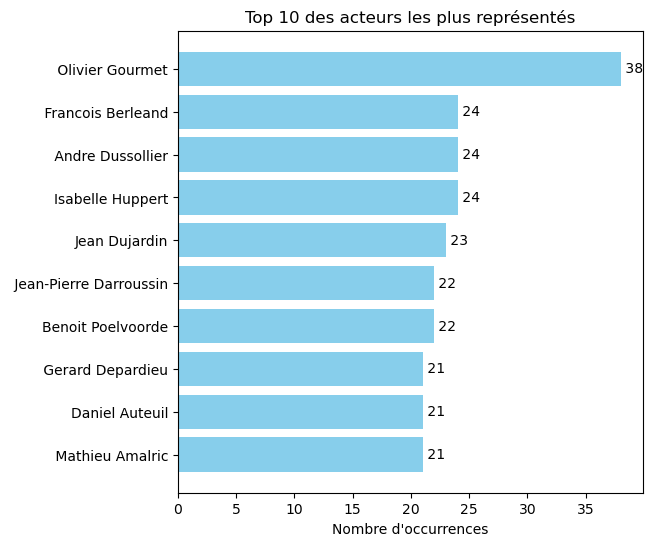

In [16]:
# Agrégation des acteurs et décompte des acteurs les plus présents

import pandas as pd
import matplotlib.pyplot as plt

# Concaténer les colonnes acteur_1, acteur_2, acteur_3, acteur_4
all_actors = pd.concat([allocine['acteur_1'], allocine['acteur_2'], allocine['acteur_3'], allocine['acteur_4']])

# Compter les occurrences de chaque acteur
actor_counts = all_actors.value_counts()

# Sélectionner les 10 acteurs les plus représentés
top_10_actors = actor_counts.head(10)

# Créer un diagramme à barres horizontales pour afficher les acteurs
plt.figure(figsize=(6, 6))
bars = plt.barh(top_10_actors.index, top_10_actors.values, color='skyblue')
plt.xlabel('Nombre d\'occurrences')
plt.title('Top 10 des acteurs les plus représentés')

# Ajouter des annotations textuelles pour chaque barre
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f' {int(bar.get_width())}',  # Afficher le nombre d'apparitions
             va='center')

plt.gca().invert_yaxis()  # Inverser l'axe y pour que la barre avec la valeur la plus haute soit en haut
plt.show()

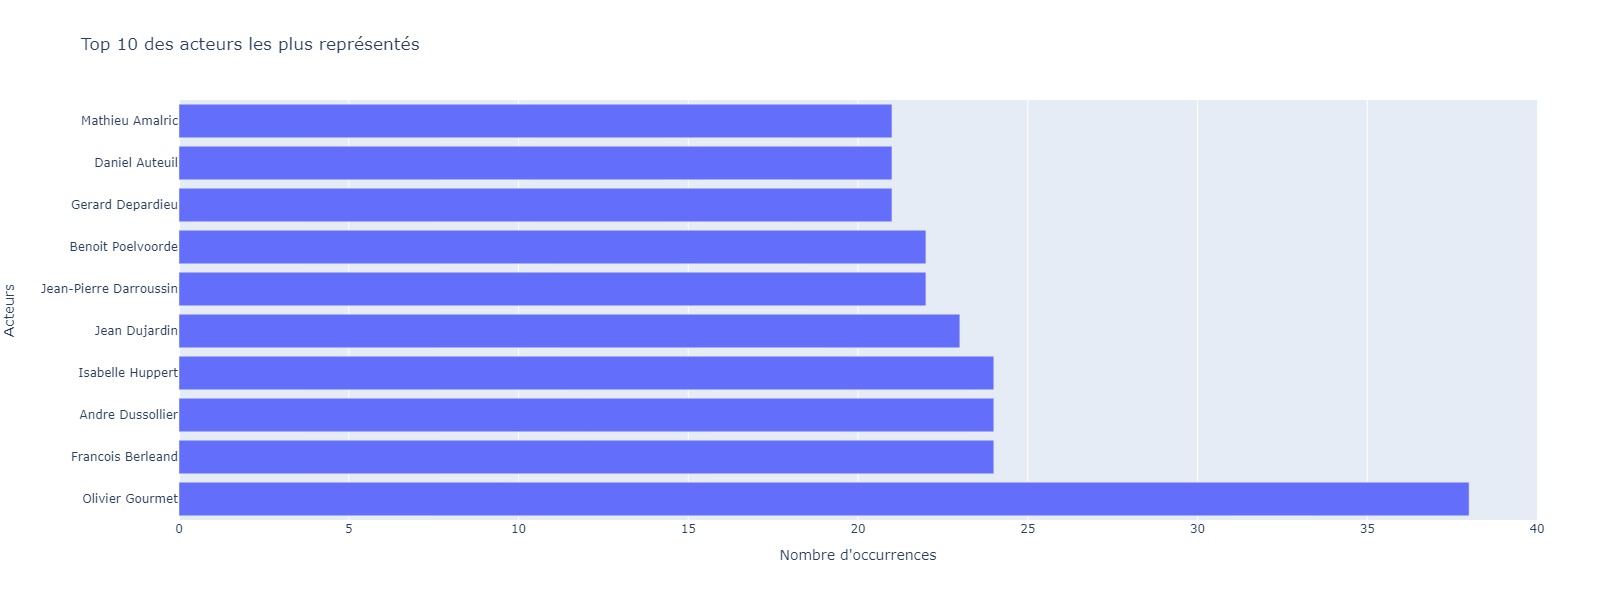

In [15]:
# Agrégation des acteurs et décompte des acteurs les plus présents avec plotly

import plotly.express as px
import pandas as pd

# Concaténer les colonnes acteur_1, acteur_2, acteur_3, acteur_4
all_actors = pd.concat([allocine['acteur_1'], allocine['acteur_2'], allocine['acteur_3'], allocine['acteur_4']])

# Compter les occurrences de chaque acteur
actor_counts = all_actors.value_counts()

# Sélectionner les 10 acteurs les plus représentés
top_10_actors = actor_counts.head(10)

# Créer un diagramme à barres horizontales pour afficher les acteurs
fig = px.bar(top_10_actors, x=top_10_actors.values, y=top_10_actors.index, orientation='h',
             labels={'y': 'Acteurs', 'x': 'Nombre d\'occurrences'},
             title='Top 10 des acteurs les plus représentés')

# Personnaliser la présentation
fig.update_layout(
    xaxis_title='Nombre d\'occurrences',
    yaxis_title='Acteurs',
    height=600
)

# Afficher le graphique
fig.show()

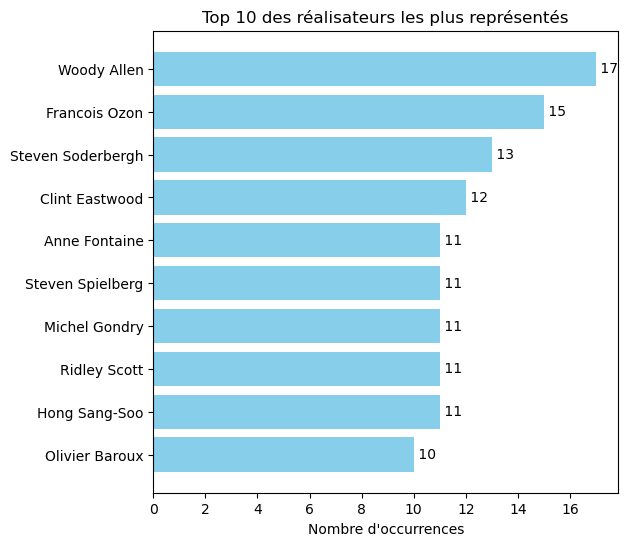

In [14]:
# Agrégation des réalisateurs et décompte des réalisateurs les plus présents

import pandas as pd
import matplotlib.pyplot as plt

# Concaténer les colonnes real_1, real_2
all_real = pd.concat([allocine['real_1'], allocine['real_2']])

# Compter les occurrences de chaque réalisateur
real_counts = all_real.value_counts()

# Sélectionner les 10 réalisateurs les plus représentés
top_10_real = real_counts.head(10)

# Créer un diagramme à barres horizontales pour afficher les réalisateurs
plt.figure(figsize=(6, 6))
bars = plt.barh(top_10_real.index, top_10_real.values, color='skyblue')
plt.xlabel('Nombre d\'occurrences')
plt.title('Top 10 des réalisateurs les plus représentés')

# Ajouter des annotations textuelles pour chaque barre
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f' {int(bar.get_width())}',  # Afficher le nombre d'apparitions
             va='center')

plt.gca().invert_yaxis()  # Inverser l'axe y pour que la barre avec la valeur la plus haute soit en haut
plt.show()

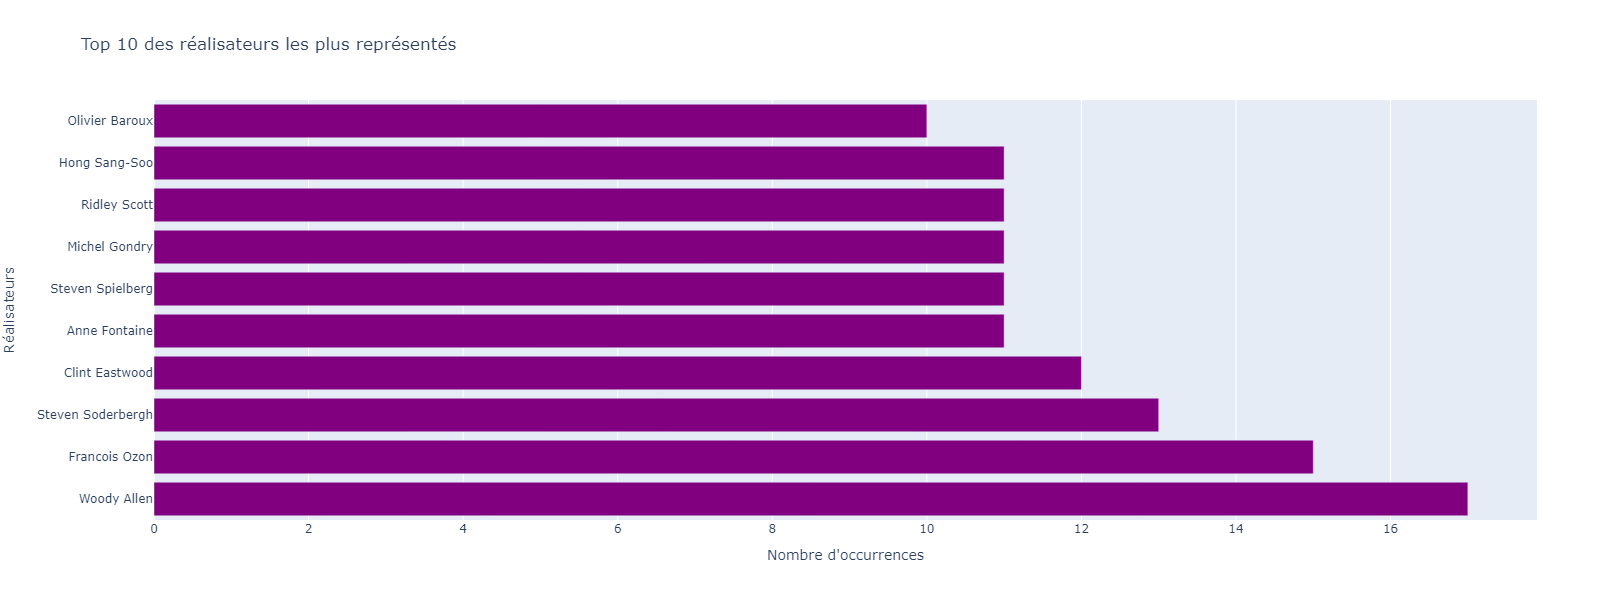

In [13]:
# Agrégation des réalisateurs et décompte des réalisateurs les plus présents avec plotly

import plotly.express as px
import pandas as pd

# Concaténer les colonnes real_1, real_2
all_real = pd.concat([allocine['real_1'], allocine['real_2']])

# Compter les occurrences de chaque réalisateur
real_counts = all_real.value_counts()

# Sélectionner les 10 réalisateurs les plus représentés
top_10_real = real_counts.head(10)

# Créer un diagramme à barres horizontales pour afficher les réalisateurs
fig = px.bar(top_10_real, x=top_10_real.values, y=top_10_real.index, orientation='h',
             labels={'y': 'Réalisateurs', 'x': 'Nombre d\'occurrences'},
             title='Top 10 des réalisateurs les plus représentés',
             color_discrete_sequence=['purple'])

# Personnaliser la présentation
fig.update_layout(
    xaxis_title='Nombre d\'occurrences',
    yaxis_title='Réalisateurs',
    height=600  # Ajuster la hauteur pour une meilleure visualisation
)

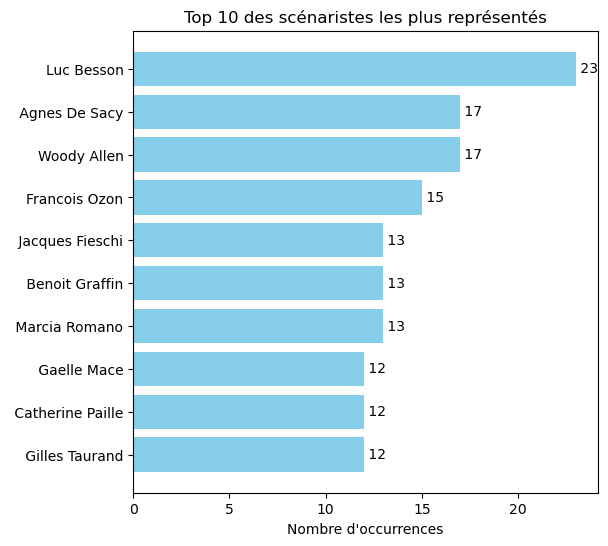

In [12]:
# Agrégation des scénaristes et décompte des scénaristes les plus présents

import pandas as pd
import matplotlib.pyplot as plt

# Concaténer les colonnes scen_1, scen_2, scen_3
all_scen = pd.concat([allocine['scen_1'], allocine['scen_2'], allocine['scen_3']])

# Compter les occurrences de chaque scénariste
scen_counts = all_scen.value_counts()

# Sélectionner les 10 scénaristes les plus représentés
top_10_scen = scen_counts.head(10)

# Créer un diagramme à barres horizontales pour afficher les scénaristes
plt.figure(figsize=(6, 6))
bars = plt.barh(top_10_scen.index, top_10_scen.values, color='skyblue')
plt.xlabel('Nombre d\'occurrences')
plt.title('Top 10 des scénaristes les plus représentés')

# Ajouter des annotations textuelles pour chaque barre
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f' {int(bar.get_width())}',  # Afficher le nombre d'apparitions
             va='center')

plt.gca().invert_yaxis()  # Inverser l'axe y pour que la barre avec la valeur la plus haute soit en haut
plt.show()

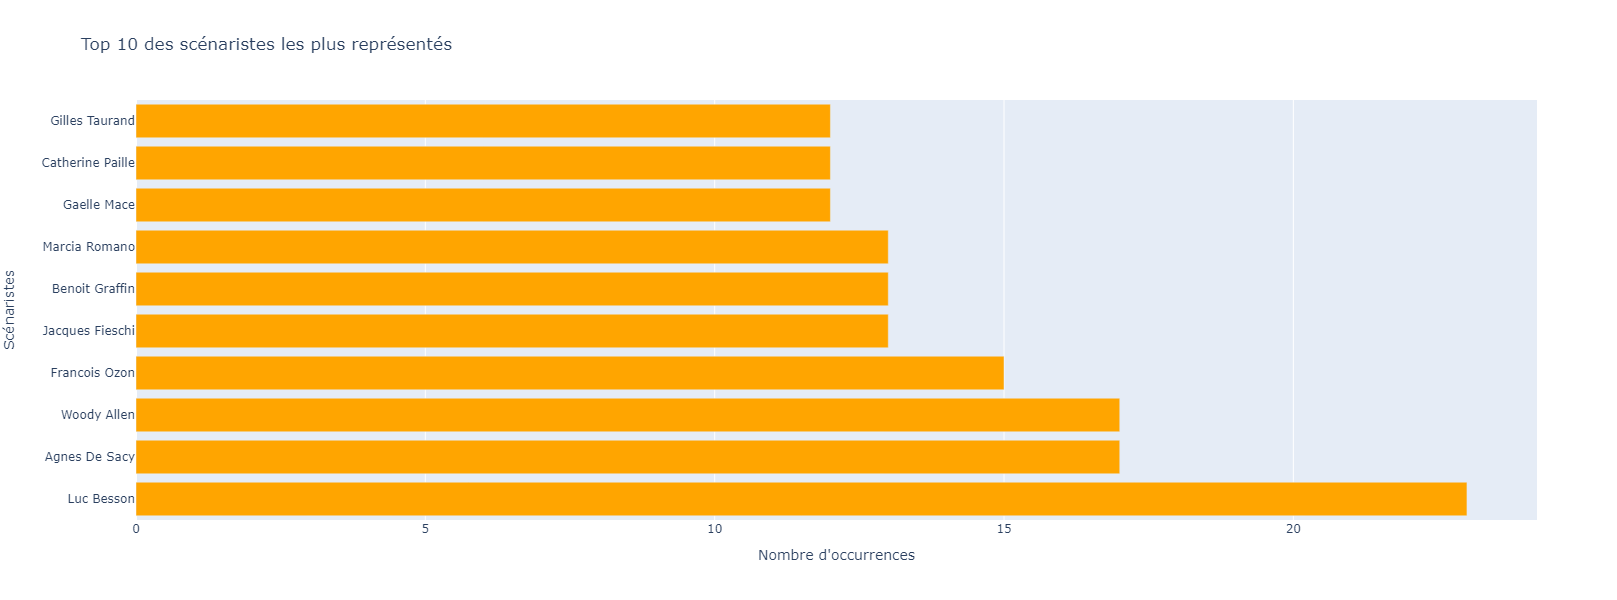

In [11]:
# Agrégation des scénaristes et décompte des scénaristes les plus présents avec plotly

import plotly.express as px
import pandas as pd

# Concaténer les colonnes scen_1, scen_2, scen_3
all_scen = pd.concat([allocine['scen_1'], allocine['scen_2'], allocine['scen_3']])

# Compter les occurrences de chaque scénariste
scen_counts = all_scen.value_counts()

# Sélectionner les 10 scénaristes les plus représentés
top_10_scen = scen_counts.head(10)

# Créer un diagramme à barres horizontales pour afficher les scénaristes
fig = px.bar(top_10_scen, x=top_10_scen.values, y=top_10_scen.index, orientation='h',
             labels={'y': 'Scénaristes', 'x': 'Nombre d\'occurrences'},
             title='Top 10 des scénaristes les plus représentés',
             color_discrete_sequence=['orange'])

# Personnaliser la présentation
fig.update_layout(
    xaxis_title='Nombre d\'occurrences',
    yaxis_title='Scénaristes',
    height=600
)

# Afficher le graphique
fig.show()

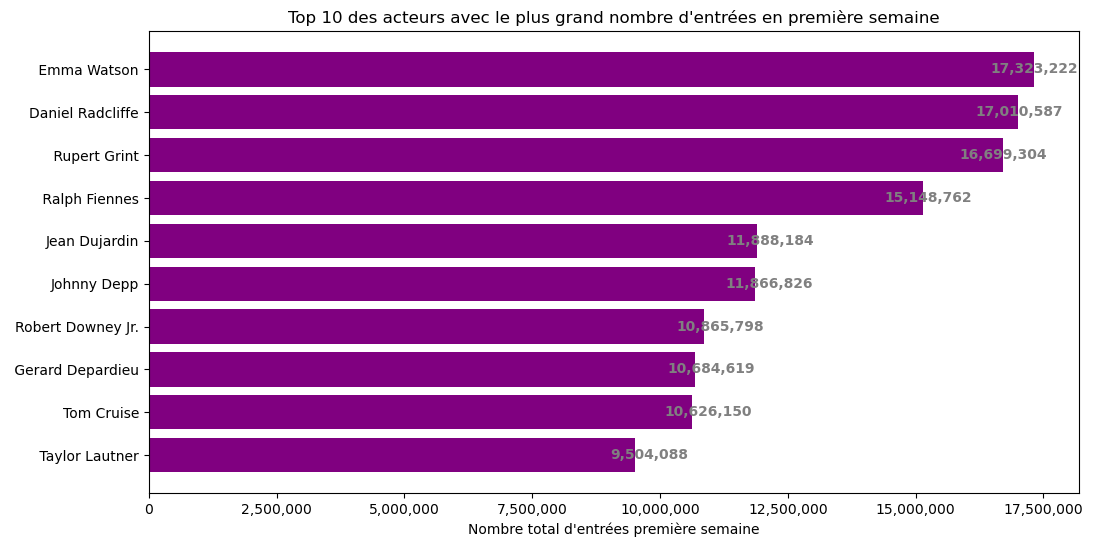

In [10]:
# Acteurs ayant réalisé le plus d'entrées cumulées en première semaine

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Étape 1: Créer un DataFrame long en fondant les acteurs dans une seule colonne avec les informations supplémentaires
actors_columns = ['acteur_1', 'acteur_2', 'acteur_3', 'acteur_4']
melted_actors = pd.melt(allocine, id_vars=['titre_original', 'premiere_semaine_france'], value_vars=actors_columns, var_name='actor_role', value_name='actor')
melted_actors = melted_actors.dropna(subset=['actor'])

# Étape 2: Grouper par 'actor' et calculer la somme des entrées pour chaque acteur
actor_entries = melted_actors.groupby('actor')['premiere_semaine_france'].sum()

# Étape 3: Trier les données pour obtenir les 10 acteurs avec le plus grand nombre d'entrées
top_10_actors = actor_entries.sort_values(ascending=False).head(10)

# Créer un diagramme à barres horizontales
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_actors.index, top_10_actors.values, color='purple')
plt.xlabel('Nombre total d\'entrées première semaine')
plt.title('Top 10 des acteurs avec le plus grand nombre d\'entrées en première semaine')

# Formater les nombres de l'axe des abscisses pour inclure des virgules
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ajouter des annotations textuelles pour chaque barre
for bar in bars:
    plt.text(bar.get_width() - bar.get_width() * 0.05, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width()):,}',  # Afficher le nombre d'apparitions, formaté avec des virgules
             va='center', color='grey', fontweight='bold')

plt.gca().invert_yaxis()  # Inverser l'axe y pour que la barre avec la valeur la plus haute soit en haut
plt.show()

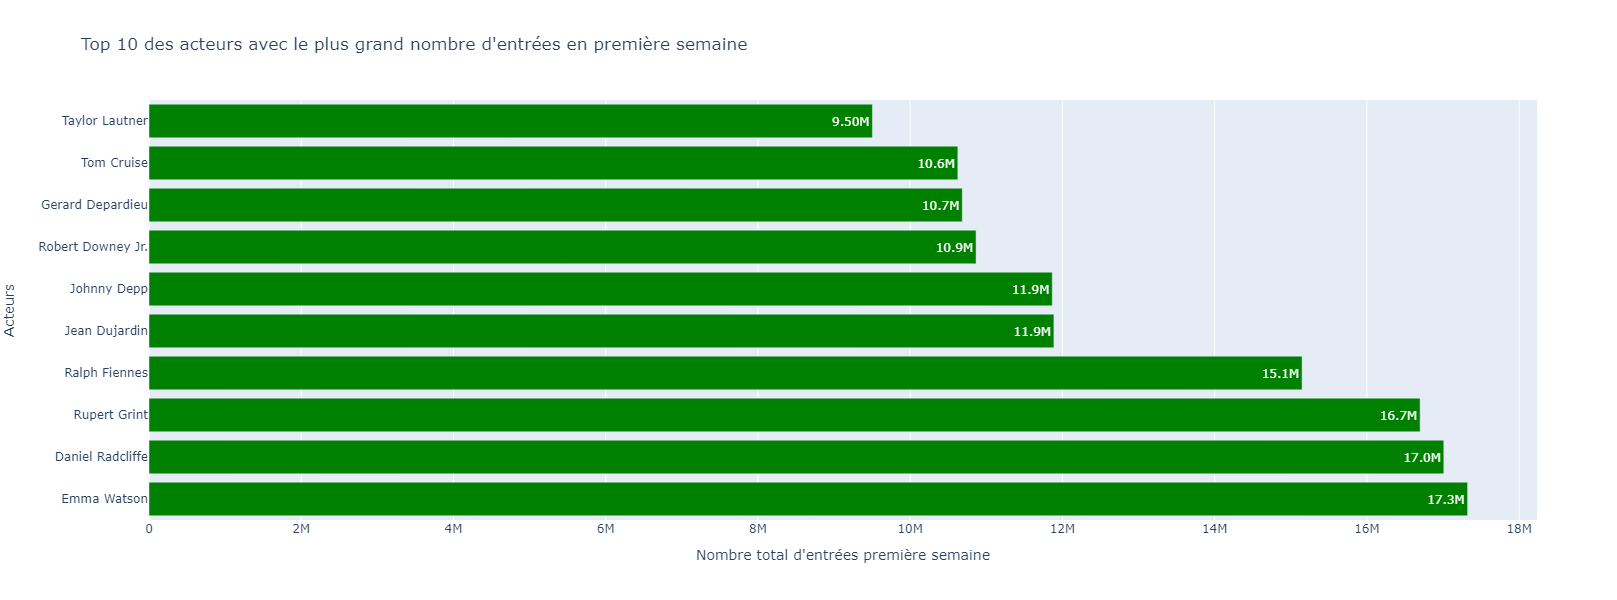

In [18]:
# Acteurs ayant réalisé le plus d'entrées cumulées en première semaine avec plotly

import plotly.express as px
import pandas as pd

# Étape 1: Créer un DataFrame long en fusionnant les colonnes des acteurs
actors_columns = ['acteur_1', 'acteur_2', 'acteur_3', 'acteur_4']
melted_actors = pd.melt(allocine, id_vars=['titre_original', 'premiere_semaine_france'], 
                        value_vars=actors_columns, var_name='actor_role', value_name='actor')

# Éliminer les valeurs NaN qui peuvent exister après la fusion
melted_actors = melted_actors.dropna(subset=['actor'])

# Étape 2: Grouper par 'actor' et calculer la somme des entrées pour chaque acteur
actor_entries = melted_actors.groupby('actor')['premiere_semaine_france'].sum()

# Étape 3: Trier les données pour obtenir les 10 acteurs avec le plus grand nombre d'entrées
top_10_actors = actor_entries.sort_values(ascending=False).head(10)

# Créer un diagramme à barres horizontales pour afficher les acteurs
fig = px.bar(top_10_actors, x=top_10_actors.values, y=top_10_actors.index, orientation='h',
             text=top_10_actors.values,  # Afficher le texte à l'intérieur des barres
             labels={'y': 'Acteurs', 'x': 'Nombre total d\'entrées première semaine'},
             color_discrete_sequence=['green'],
             title='Top 10 des acteurs avec le plus grand nombre d\'entrées en première semaine')

# Personnaliser l'affichage du texte et les axes
fig.update_traces(texttemplate='%{text:.3s}', textposition='inside')
fig.update_layout(
    xaxis_title='Nombre total d\'entrées première semaine',
    yaxis_title='Acteurs',
    uniformtext_minsize=8, uniformtext_mode='hide',
    height=600
)

# Afficher le graphique
fig.show()

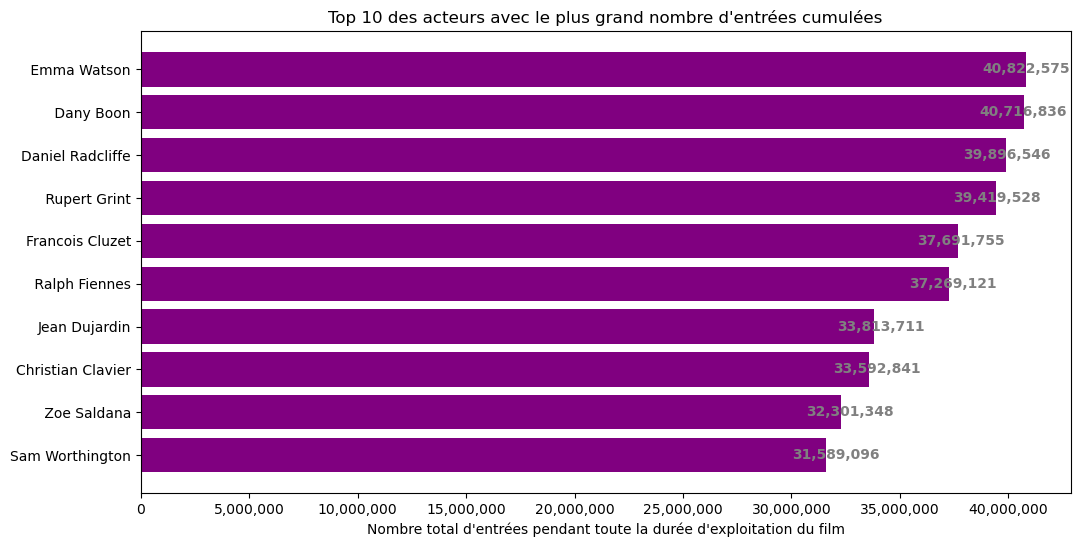

In [19]:
# Acteurs ayant réalisé le plus d'entrées cumulées sur toute la carrière des films

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Étape 1: Créer un DataFrame long en fondant les acteurs dans une seule colonne avec les informations supplémentaires
actors_columns_cumul = ['acteur_1', 'acteur_2', 'acteur_3', 'acteur_4']
melted_actors_cumul = pd.melt(allocine, id_vars=['titre_original', 'cumul_france'], value_vars=actors_columns, var_name='actor_role', value_name='actor')
melted_actors_cumul = melted_actors_cumul.dropna(subset=['actor'])

# Étape 2: Grouper par 'actor' et calculer la somme des entrées pour chaque acteur
actor_entries_cumul = melted_actors_cumul.groupby('actor')['cumul_france'].sum()

# Étape 3: Trier les données pour obtenir les 10 acteurs avec le plus grand nombre d'entrées
top_10_actors_cumul = actor_entries_cumul.sort_values(ascending=False).head(10)

# Créer un diagramme à barres horizontales
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_actors_cumul.index, top_10_actors_cumul.values, color='purple')
plt.xlabel('Nombre total d\'entrées pendant toute la durée d\'exploitation du film')
plt.title('Top 10 des acteurs avec le plus grand nombre d\'entrées cumulées')

# Formater les nombres de l'axe des abscisses pour inclure des virgules
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ajouter des annotations textuelles pour chaque barre
for bar in bars:
    plt.text(bar.get_width() - bar.get_width() * 0.05, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width()):,}',  # Afficher le nombre d'apparitions, formaté avec des virgules
             va='center', color='grey', fontweight='bold')

plt.gca().invert_yaxis()  # Inverser l'axe y pour que la barre avec la valeur la plus haute soit en haut
plt.show()

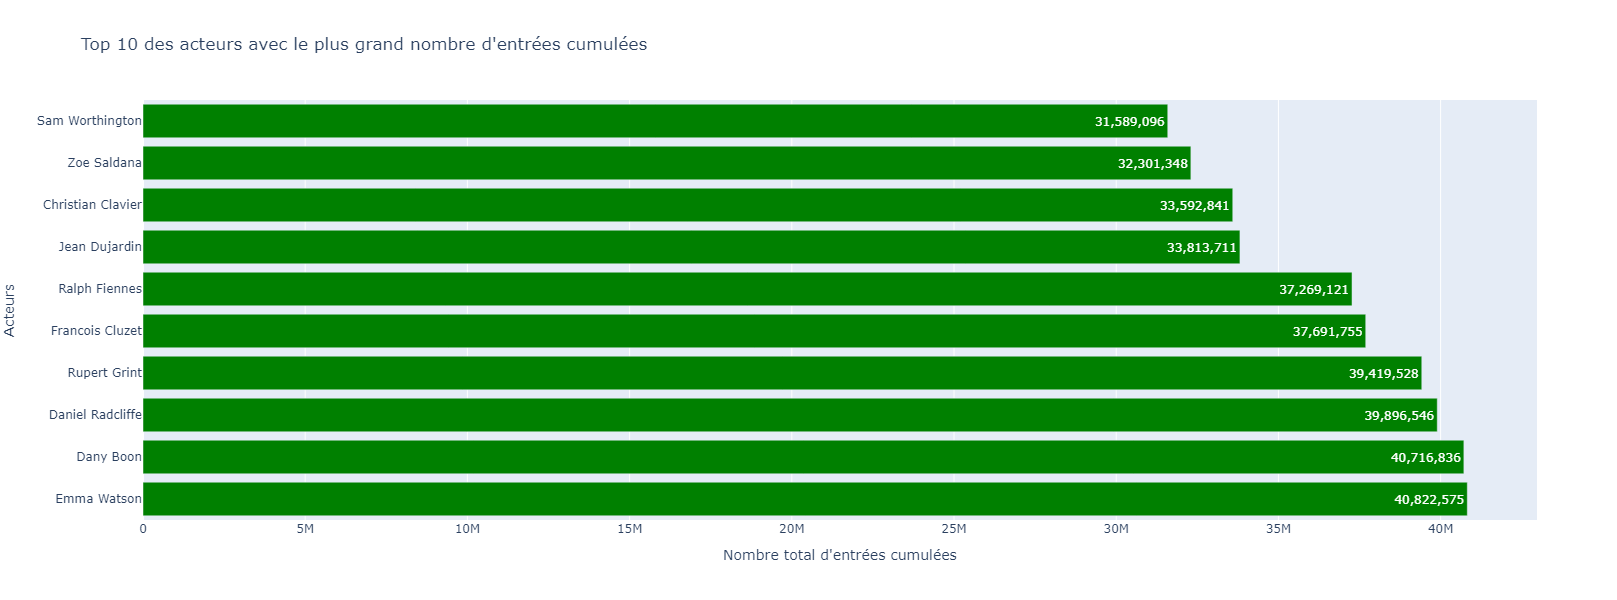

In [20]:
# Acteurs ayant réalisé le plus d'entrées cumulées sur toute la carrière des films avec plotly

import plotly.express as px
import pandas as pd

# Étape 1: Créer un DataFrame long en fusionnant les colonnes des acteurs
actors_columns_cumul = ['acteur_1', 'acteur_2', 'acteur_3', 'acteur_4']
melted_actors_cumul = pd.melt(allocine, id_vars=['titre_original', 'cumul_france'], 
                              value_vars=actors_columns_cumul, var_name='actor_role', value_name='actor')
melted_actors_cumul = melted_actors_cumul.dropna(subset=['actor'])

# Étape 2: Grouper par 'actor' et calculer la somme des entrées pour chaque acteur
actor_entries_cumul = melted_actors_cumul.groupby('actor')['cumul_france'].sum()

# Étape 3: Trier les données pour obtenir les 10 acteurs avec le plus grand nombre d'entrées
top_10_actors_cumul = actor_entries_cumul.sort_values(ascending=False).head(10)

# Créer un diagramme à barres horizontales pour afficher les acteurs
fig = px.bar(top_10_actors_cumul, x=top_10_actors_cumul.values, y=top_10_actors_cumul.index, orientation='h',
             text=top_10_actors_cumul.values,  # Afficher le texte à l'intérieur des barres
             labels={'y': 'Acteurs', 'x': 'Nombre total d\'entrées cumulées'},
             color_discrete_sequence=['green'],
             title='Top 10 des acteurs avec le plus grand nombre d\'entrées cumulées')

# Personnaliser l'affichage du texte et les axes
fig.update_traces(texttemplate='%{text:,}', textposition='inside')
fig.update_layout(
    xaxis_title='Nombre total d\'entrées cumulées',
    yaxis_title='Acteurs',
    height=600,
    uniformtext_minsize=8, uniformtext_mode='hide'
)

# Afficher le graphique
fig.show()

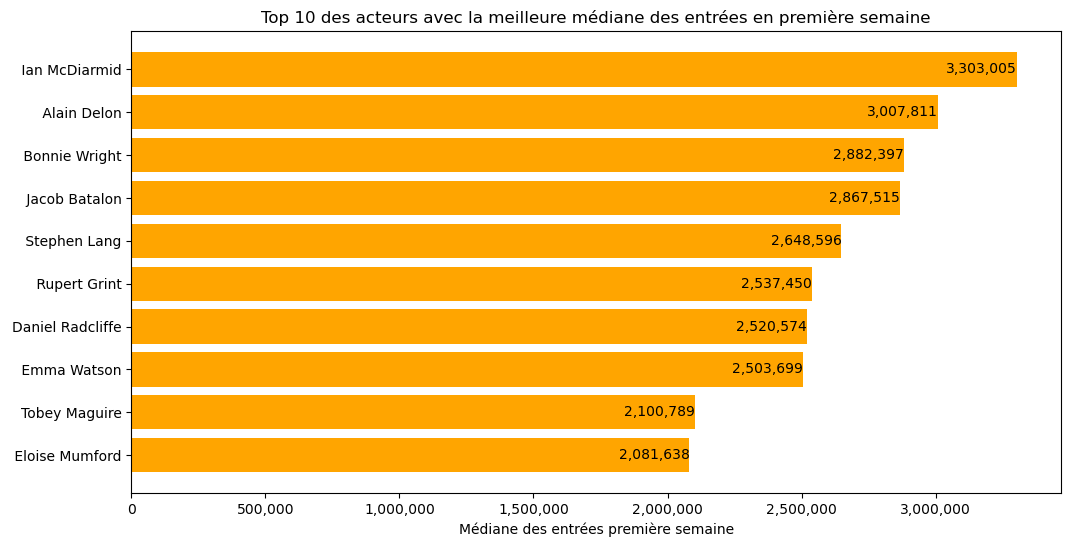

In [21]:
# Acteurs ayant réalisé la meilleure médiane d'entrées cumulées en première semaine

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Étape 1: Créer un DataFrame long en fusionnant les colonnes des acteurs
actors_columns = ['acteur_1', 'acteur_2', 'acteur_3', 'acteur_4']
melted_actors = pd.melt(allocine, id_vars=['titre_original', 'premiere_semaine_france'], 
                        value_vars=actors_columns, var_name='actor_role', value_name='actor')
melted_actors = melted_actors.dropna(subset=['actor'])

# Étape 2: Grouper par 'actor' et calculer la médiane des entrées pour chaque acteur
actor_medians = melted_actors.groupby('actor')['premiere_semaine_france'].median()

# Étape 3: Trier les données pour obtenir les 10 acteurs avec la meilleure médiane d'entrées
top_10_actors_by_median = actor_medians.sort_values(ascending=False).head(10)

# Créer un diagramme à barres horizontales
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_actors_by_median.index, top_10_actors_by_median.values, color='orange')
plt.xlabel('Médiane des entrées première semaine')
plt.title('Top 10 des acteurs avec la meilleure médiane des entrées en première semaine')

# Formater les nombres de l'axe des abscisses pour inclure des virgules
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ajouter des annotations textuelles pour chaque barre
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width()):,}',  # Afficher la médiane d'entrées, formatée avec des virgules
             va='center', ha='right', color='black')

plt.gca().invert_yaxis()  # Inverser l'axe y pour que la barre avec la valeur la plus haute soit en haut
plt.show()

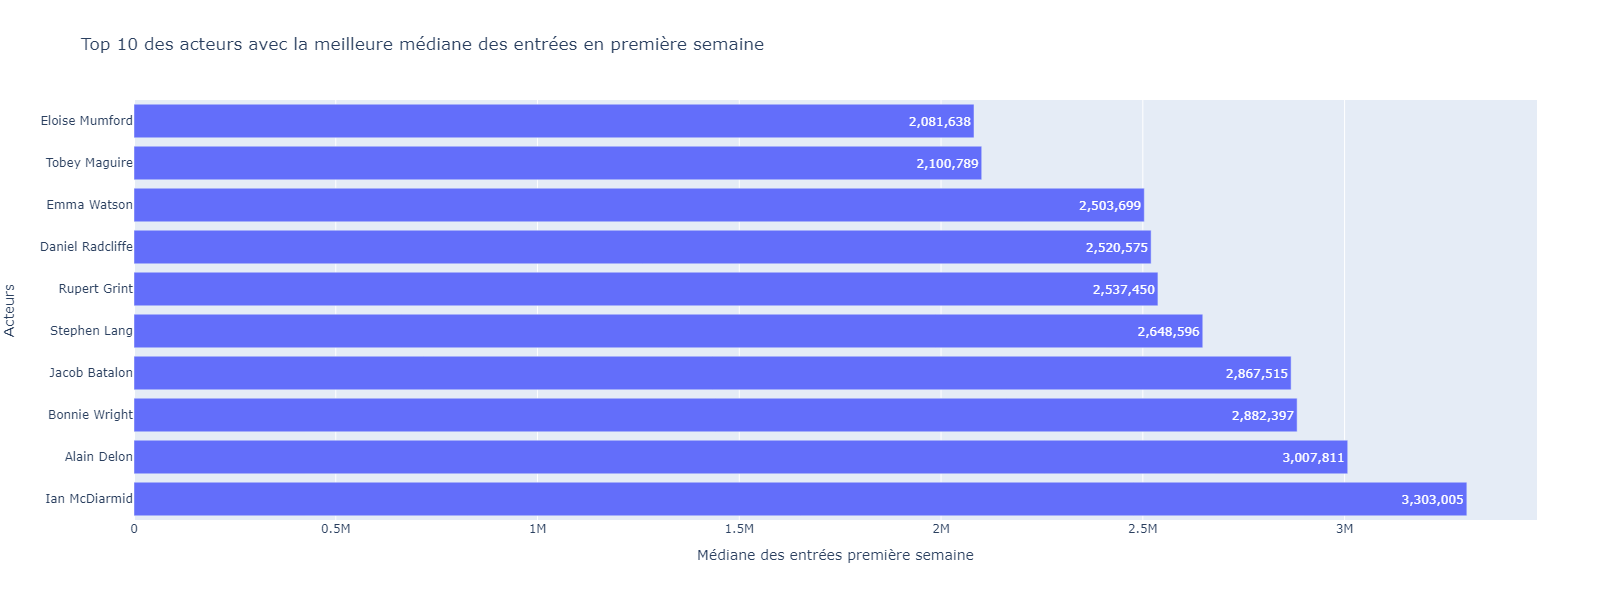

In [22]:
# Acteurs ayant réalisé la meilleure médiane d'entrées cumulées en première semaine avec plotly

import pandas as pd
import plotly.express as px

# Étape 1: Créer un DataFrame long en fusionnant les colonnes des acteurs
actors_columns = ['acteur_1', 'acteur_2', 'acteur_3', 'acteur_4']
melted_actors = pd.melt(allocine, id_vars=['titre_original', 'premiere_semaine_france'], 
                        value_vars=actors_columns, var_name='actor_role', value_name='actor')
melted_actors = melted_actors.dropna(subset=['actor'])

# Étape 2: Grouper par 'actor' et calculer la médiane des entrées pour chaque acteur
actor_medians = melted_actors.groupby('actor')['premiere_semaine_france'].median()

# Étape 3: Trier les données pour obtenir les 10 acteurs avec la meilleure médiane d'entrées
top_10_actors_by_median = actor_medians.sort_values(ascending=False).head(10)

# Créer un diagramme à barres horizontales pour afficher les acteurs
fig = px.bar(top_10_actors_by_median, x=top_10_actors_by_median.values, y=top_10_actors_by_median.index, orientation='h',
             labels={'y': 'Acteurs', 'x': 'Médiane des entrées première semaine'},
             title='Top 10 des acteurs avec la meilleure médiane des entrées en première semaine')

# Personnaliser l'affichage du texte et les axes
fig.update_traces(texttemplate='%{x:,.0f}', textposition='inside')
fig.update_layout(
    xaxis_title='Médiane des entrées première semaine',
    yaxis_title='Acteurs',
    height=600,
    uniformtext_minsize=8, uniformtext_mode='hide'
)

# Afficher le graphique
fig.show()

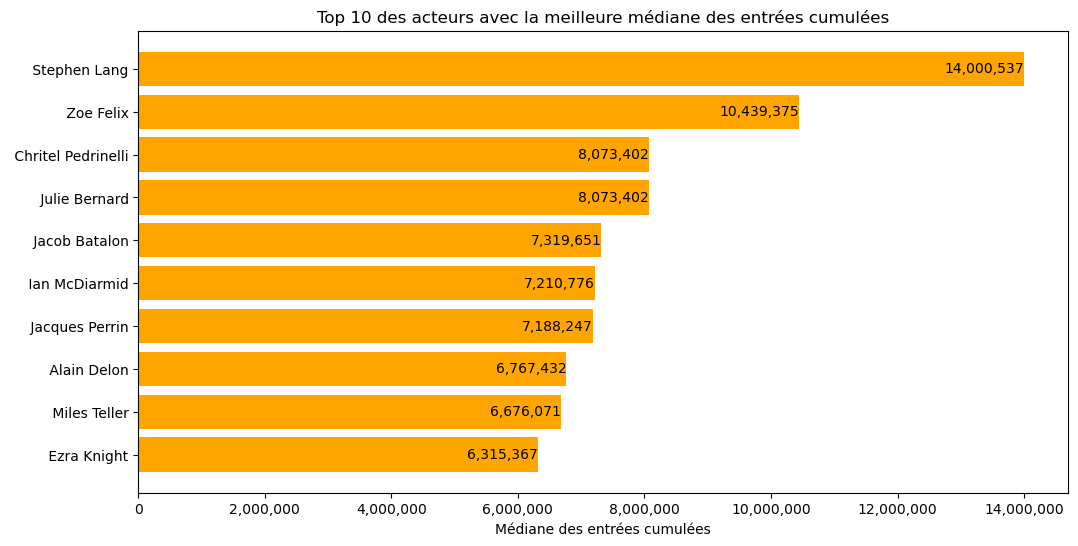

In [23]:
# Acteurs ayant réalisé la meilleure médiane d'entrées cumulées sur toute la durée d'exploitation du film au cinéma

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Étape 1: Créer un DataFrame long en fusionnant les colonnes des acteurs
actors_columns = ['acteur_1', 'acteur_2', 'acteur_3', 'acteur_4']
melted_actors = pd.melt(allocine, id_vars=['titre_original', 'cumul_france'], 
                        value_vars=actors_columns, var_name='actor_role', value_name='actor')
melted_actors = melted_actors.dropna(subset=['actor'])

# Étape 2: Grouper par 'actor' et calculer la médiane des entrées cumulées pour chaque acteur
actor_medians_cumul = melted_actors.groupby('actor')['cumul_france'].median()

# Étape 3: Trier les données pour obtenir les 10 acteurs avec la meilleure médiane d'entrées cumulées
top_10_actors_by_median_cumul = actor_medians_cumul.sort_values(ascending=False).head(10)

# Créer un diagramme à barres horizontales
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_actors_by_median_cumul.index, top_10_actors_by_median_cumul.values, color='orange')
plt.xlabel('Médiane des entrées cumulées')
plt.title('Top 10 des acteurs avec la meilleure médiane des entrées cumulées')

# Formater les nombres de l'axe des abscisses pour inclure des virgules
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ajouter des annotations textuelles pour chaque barre
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width()):,}',  # Afficher la médiane d'entrées, formatée avec des virgules
             va='center', ha='right', color='black')

plt.gca().invert_yaxis()  # Inverser l'axe y pour que la barre avec la valeur la plus haute soit en haut
plt.show()

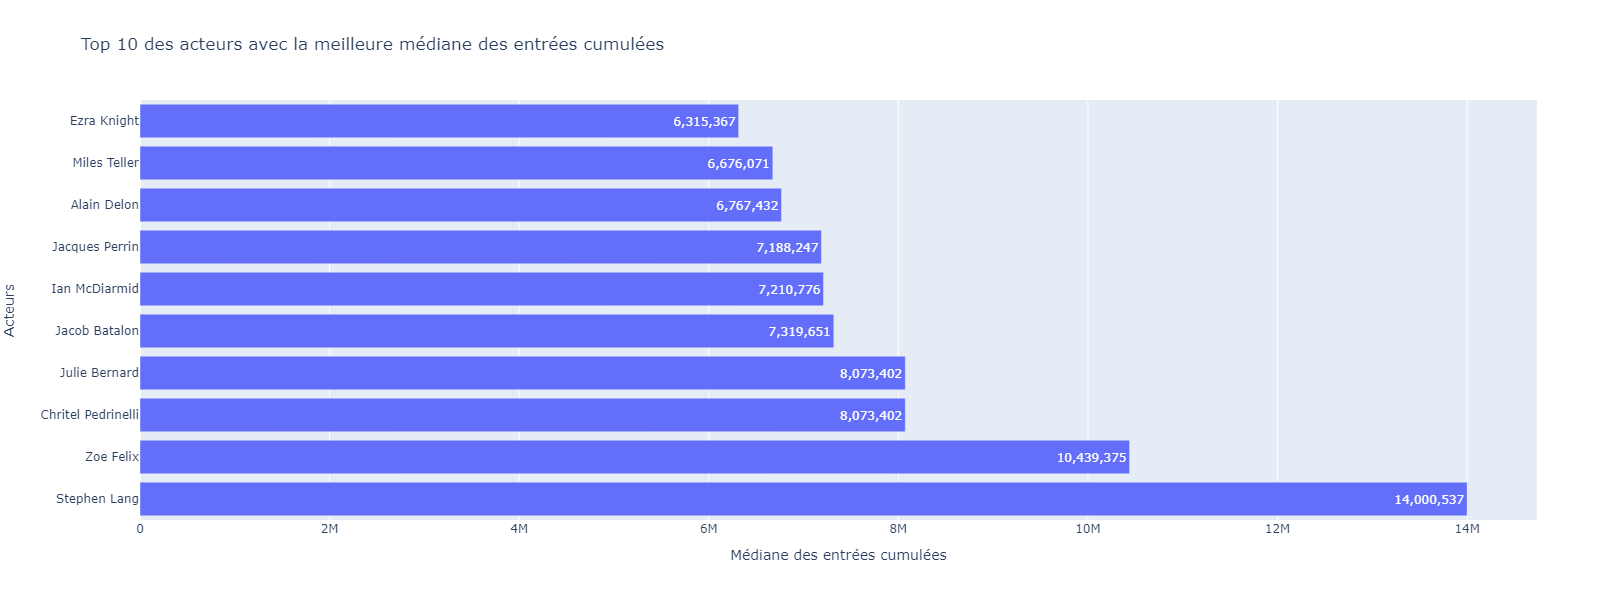

In [24]:
# Acteurs ayant réalisé la meilleure médiane d'entrées cumulées sur toute la durée d'exploitation du film au cinéma avec plotly

import plotly.express as px
import pandas as pd

# Étape 1: Créer un DataFrame long en fusionnant les colonnes des acteurs
actors_columns = ['acteur_1', 'acteur_2', 'acteur_3', 'acteur_4']
melted_actors = pd.melt(allocine, id_vars=['titre_original', 'cumul_france'], 
                        value_vars=actors_columns, var_name='actor_role', value_name='actor')
melted_actors = melted_actors.dropna(subset=['actor'])

# Étape 2: Grouper par 'actor' et calculer la médiane des entrées cumulées pour chaque acteur
actor_medians_cumul = melted_actors.groupby('actor')['cumul_france'].median()

# Étape 3: Trier les données pour obtenir les 10 acteurs avec la meilleure médiane d'entrées cumulées
top_10_actors_by_median_cumul = actor_medians_cumul.sort_values(ascending=False).head(10)

# Créer un diagramme à barres horizontales pour afficher les acteurs
fig = px.bar(top_10_actors_by_median_cumul, x=top_10_actors_by_median_cumul.values, y=top_10_actors_by_median_cumul.index, orientation='h',
             text=top_10_actors_by_median_cumul.values,  # Afficher le texte à l'intérieur des barres
             labels={'y': 'Acteurs', 'x': 'Médiane des entrées cumulées'},
             title='Top 10 des acteurs avec la meilleure médiane des entrées cumulées')

# Personnaliser l'affichage du texte et les axes
fig.update_traces(texttemplate='%{text:,.0f}', textposition='inside')
fig.update_layout(
    xaxis_title='Médiane des entrées cumulées',
    yaxis_title='Acteurs',
    uniformtext_minsize=8, uniformtext_mode='hide',
    height=600
)

# Afficher le graphique
fig.show()